In [20]:
# Import necessary packages
import os
import pathlib
import re # Parsing info out of file names
from math import floor, ceil

import earthaccess # Access NASA data from the cloud
import geopandas as gpd # Working with vector data
import pandas as pd # Aggregating and data manipulation
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import rioxarray as rxr # Work with raster data

In [2]:
# Set up a project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat-suitability'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\riede\\earth-analytics\\data\\habitat-suitability'

## 1. Define study area:

* Download the USFS National Grassland Units

* Select study sites: Caddo National Grasslands and Sheyenne National Grasslands
    * Caddo National Grasslands is mainly in Texas, USA, although a small portion of it is in Oklahoma too. It is comprised of two units: Bois d' Arc Creek Unit (13,360 acres) and Ladonia Unit (2,780 acres). It is 17,785 acres and has 3 lakes: Lake Coffee Mill (651 acres), Lake Crockett (388 acres), and Lake Fannin (45 acres). In the Caddo Grasslands you can do several recreational activities such as camping, picnicking, and fishing. The Caddo is also home to wildlife such as coyotes, waterfowl, turkey, largemouth bass, and sunfish. 
    * Sheyenne National Grasslands is in the southeastern corner of North Dakota, USA and includes 70,180 acres of public land amid 64,769 acres of private land. Similar to Caddo National Grasslands, you can camp, hike, hunt, and backpack as well as other recreational activities. This tallgrass prairie is home to prairie chickens, the Dakota skipper (a small butterfly), the Regal Fritillary (another type of butterfly), ferns, and the western prairie fringed orchid. 

* Citations:
    1. “Caddo-LBJ National Grasslands.” National Forests and Grasslands in Texas, U.S. Forest Service, U.S. Department of Agriculture, www.fs.usda.gov/detail/texas/about-forest/districts/?cid=fswdev3_008440. Accessed 2 Dec. 2024. 
    2. Caddo National Grasslands WMA, Texas Parks and Wildlife Department, tpwd.texas.gov/huntwild/hunt/wma/find_a_wma/list/?id=4. Accessed 2 Dec. 2024.
    3. “Sheyenne National Grassland.” Dakota Prairie Grasslands, U.S. Forest Service, U.S. Department of Agriculture, www.fs.usda.gov/recarea/dpg/recarea/?recid=79470. Accessed 2 Dec. 2024. 


,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
0,187245,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.0841 44.28163, -100.0841 44.278..."
1,187246,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.99601 41.84049, -121.9960..."
2,187247,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30415 36.08063, -104.3041..."
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."
4,187249,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82222 45.95897, -101.8170..."
5,187250,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.9166 35.71892, -99.91662 3..."
6,187251,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62994 36.44073, -102.6298..."
7,187252,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46006 43.31909, -105.4601..."
8,187253,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86004 35.20951, -100.86009 35.2..."
9,187254,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


<Axes: >

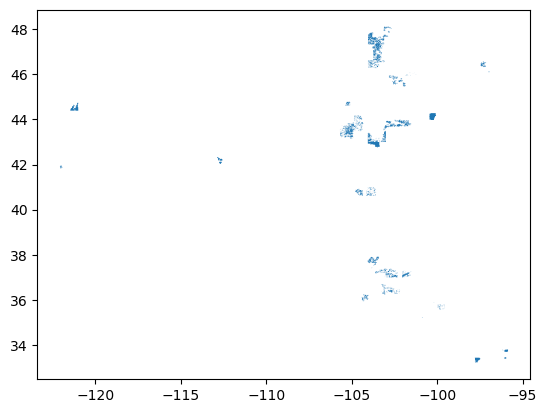

In [3]:
# Set up the grassland URL
grasslands_url = ("https://apps.fs.usda.gov/arcx/rest/services"
    "/EDW/EDW_NationalGrassland_01/MapServer/0"
    "/query?where=1%3D1&outFields=*&geometry=&geometry"
    "Type=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json")

# Set up a path to save the data on your machine
grasslands_dir = os.path.join(data_dir, 'grasslands_dir')

# Make the grasslands directory
os.makedirs(grasslands_dir, exist_ok=True)

# Join grasslands shapefile path
grasslands_path = os.path.join(grasslands_dir, 'S_USA.NationalGrassland.shp')

# Only download once
if not os.path.exists(grasslands_path):
    grasslands_gdf = gpd.read_file(grasslands_url)
    grasslands_gdf.to_file(grasslands_path)

# Check that the URL is correct
grasslands_gdf = gpd.read_file(grasslands_path)

# Display grasslands_gdf and plot grasslands to check download
display(grasslands_gdf)
grasslands_gdf.plot()

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."


<Axes: >

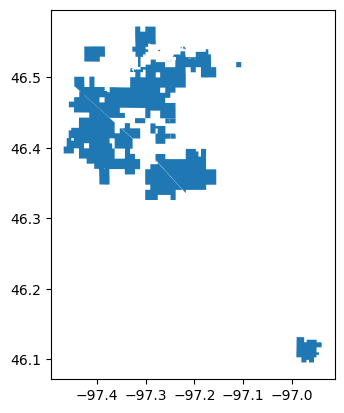

In [4]:
# Isolate Sheyenne National Grasslands from the grasslands_gdf
sheyenne_grasslands_gdf = grasslands_gdf[grasslands_gdf['GRASSLANDN']=='Sheyenne National Grassland']
display(sheyenne_grasslands_gdf)
sheyenne_grasslands_gdf.plot()

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
9,187254,295515010328,Caddo National Grassland,68479.549,0.02694,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


<Axes: >

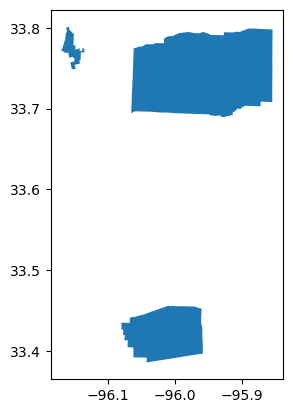

In [5]:
# Isolate Caddo National Grasslands from the grasslands_gdf
caddo_grasslands_gdf = grasslands_gdf[grasslands_gdf['GRASSLANDN']=='Caddo National Grassland']
display(caddo_grasslands_gdf)
caddo_grasslands_gdf.plot()

In [6]:
#MAYBE THIS CELL ISN'T NECESSARY B/C I DID THE ABOVE?
#  Try downloading from the URL
# Define a path to save the study area
# Only download once
#if not os.path.exists(study_area_path):
    # Download the study area

    # Save the study area

# Load the study area

# Make a plot to check that the data is what we expect

## 2. Load in soil data

For each grassland, download at least one soil variable from the [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/) as raster data. 
    
* [Further POLARIS info](https://pubs.usgs.gov/publication/70170912)

* I'll look at soil pH, specifically the mean soil pH of 30x30 meter pieces of land for the 60-100 cm depth. *S. nutans* prefers a soil pH of [4.8 to 8.0](https://www.nrcs.usda.gov/plantmaterials/etpmcpg13196.pdf) and has a minimum [root depth of 24 inches, or about 61 cm](https://plants.sc.egov.usda.gov/plant-profile/SONU2/characteristics).

* Depths of the POLARIS data set is in cm.

* Need to use rioxarray to import

### 2a. Load Sheyenne soil data

In [7]:
#  Define the download URL template for the soil data for Sheyenne
sheyenne_soil_url = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
            "v1.0"
            "/ph"
            "/mean"
            "/60_100"
            "/lat4647_lon-98-97.tif")
sheyenne_soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat4647_lon-98-97.tif'

In [8]:
# Open sheyenne_soil_url
sheyenne_soil_da = rxr.open_rasterio(
    sheyenne_soil_url,
    mask_and_scale=True
).squeeze()
sheyenne_soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -98.0 -98.0 -98.0 -98.0 ... -97.0 -97.0 -97.0
  * y            (y) float64 29kB 47.0 47.0 47.0 47.0 ... 46.0 46.0 46.0 46.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

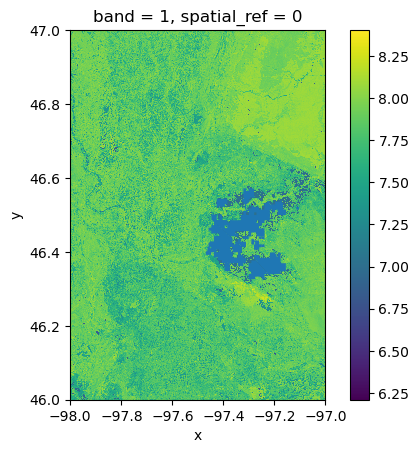

In [9]:
sheyenne_soil_da.plot()

# Plot Sheyenne National Grasslands on sheyenne_soil_da
sheyenne_grasslands_gdf.to_crs(sheyenne_soil_da.rio.crs).plot(ax = plt.gca())

### 2b. Load Caddo soil data

In [10]:
#  Define the download URL template for the soil data for Caddo
caddo_soil_url = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
            "v1.0"
            "/ph"
            "/mean"
            "/60_100"
            "/lat3334_lon-96-95.tif")
caddo_soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-96-95.tif'

In [11]:
# Open caddo_soil_url
caddo_soil_da = rxr.open_rasterio(
    caddo_soil_url,
    mask_and_scale=True
).squeeze()
caddo_soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -96.0 -96.0 -96.0 -96.0 ... -95.0 -95.0 -95.0
  * y            (y) float64 29kB 34.0 34.0 34.0 34.0 ... 33.0 33.0 33.0 33.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

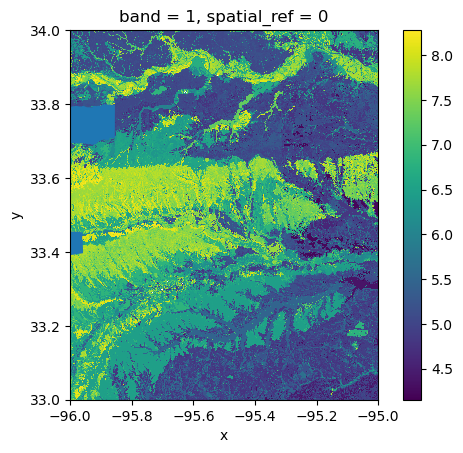

In [12]:
caddo_soil_da.plot()

# Plot Sheyenne National Grasslands on sheyenne_soil_da
caddo_grasslands_gdf.to_crs(caddo_soil_da.rio.crs).plot(ax = plt.gca())

### 2c. Loop through multiple tiles of POLARIS data

In [ ]:
#  Define the download URL template for the soil data for Caddo for loops
caddo_soil_template_url = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
            "v1.0"
            "/ph"
            "/mean"
            "/60_100"
            "/lat3334_lon{min_lon}{max_lon}.tif")

caddo_soil_loop_url = caddo_soil_template_url.format(min_lon=-97, max_lon=-95)

caddo_soil_loop_url
#when we try to actually display/plot this url, it won't work b/c it's covering two different lon files for -97 to -96 and -96 to -95

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-97-95.tif'

In [ ]:
c_bounds_min_lon, c_bounds_min_lat, c_bounds_max_lon, c_bounds_max_lat = (
    caddo_grasslands_gdf.total_bounds)

# range is the info that you need to generate the list of numbers
caddo_soil_url_list = []
for min_lon in range(floor(c_bounds_min_lon), ceil(c_bounds_max_lon)):
    for min_lat in range(floor(c_bounds_min_lat), ceil(c_bounds_max_lat)):
        soil_url = caddo_soil_template_url.format(
            min_lon=min_lon, max_lon=min_lon+1)
        caddo_soil_url_list.append(soil_url)
        
caddo_soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-97-96.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-96-95.tif']

In [29]:
sheyenne_grasslands_gdf.total_bounds

array([-97.46881033,  46.09534316, -96.93854828,  46.57204154])

In [30]:
s_bounds_min_lon, s_bounds_min_lat, s_bounds_max_lon, s_bounds_max_lat = (
    sheyenne_grasslands_gdf.total_bounds)

# range is the info that you need to generate the list of numbers
sheyenne_soil_url_list = []
for min_lon in range(floor(s_bounds_min_lon), ceil(s_bounds_max_lon)):
    for min_lat in range(floor(s_bounds_min_lat), ceil(s_bounds_max_lat)):
        soil_url = caddo_soil_template_url.format(
            min_lon=min_lon, max_lon=min_lon+1)
        sheyenne_soil_url_list.append(soil_url)
        
sheyenne_soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-98-97.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat3334_lon-97-96.tif']

In [ ]:
# THIS IS AN EXAMPLE W/ RANDOM SOIL DATA!!!
#  Define the download URL template for the soil data
soil_url = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
            "v1.0"
            "/ph"
            "/mean"
            "/60_100"
            "/lat4849_lon-94-93.tif")

# List out all the soil files we will need to download

# output_da_list = {}
# # Loop through each of the soil files
# for ... in soil_files:
#     # Download raster data

#     # Unzip the raster data

#     # Extract metadata from the file name

#     # Only download once -- Save raster data to the disk

#     # Load the raster data into Python, mask and scale and squeeze w/ .tif files

#     # Make sure that the CRS matches between the vector and raster data, this could also be done up above the output_da_list is defined
#     #.to_crs(4326)

#     # Crop the raster data
#     cropped_da = ...

#     # Make a plot to check the download

#     output_da_list.append(cropped_da)

# # Merge tiles



'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat4849_lon-94-93.tif'

## Load in elevation data

For each grassland: Download elevation from the SRTM as raster data.

In [ ]:
# Use earthaccess API

## Load in climate data

For each grassland: Download one climate variable from the MACAv2 THREDDS data server as raster data.

## Derive a topographic variable

For each grassland: calculate at least one derived topographic variable.

In [ ]:
# Make sure you're in a crs with units of meters, like UTM, not degrees

## Harmonize data

In [ ]:
# possibly use ds.rio.reproject_match() method from rioxarray

# Build fuzzy logic model

## Create at least one figure for each grassland/climate scenario combination

In [ ]:
# EXAMPLE of a for loop and accumulating the answers

a_list = [1, 2, 3, 4]

#w/o this accumulator list, when we run the for loop below w/o the prints, we just see 16
squared_number_list = []

for number in a_list:
    #print(number)
    squared_number = number**2
    #print(squared_number)
    squared_number_list.append(squared_number)

print(squared_number)
squared_number_list

16


[1, 4, 9, 16]